In [1]:
import torch
import numpy as np

In [2]:
x = torch.empty(3)

In [3]:
x

tensor([ 0.0000e+00, -3.6893e+19,  0.0000e+00])

In [4]:
x = torch.empty(5,3)

In [5]:
x

tensor([[ 0.0000e+00, -3.6893e+19, -3.1881e+27],
        [-3.6902e+19, -1.7482e+14,  4.5780e-41],
        [-1.7560e+14,  4.5780e-41, -1.7561e+14],
        [ 4.5780e-41, -1.7560e+14,  4.5780e-41],
        [ 0.0000e+00, -3.6893e+19, -3.1867e+27]])

In [6]:
x=torch.ones(2,2)

In [7]:
x

tensor([[1., 1.],
        [1., 1.]])

In [8]:
print(x.size())

torch.Size([2, 2])


In [9]:
x=torch.tensor([3.33,4.25])

In [10]:
x

tensor([3.3300, 4.2500])

In [11]:
x=torch.rand(5,3)

In [12]:
print(x)

tensor([[0.0063, 0.7576, 0.2829],
        [0.7722, 0.4991, 0.3576],
        [0.2585, 0.5644, 0.7920],
        [0.1884, 0.4675, 0.6284],
        [0.5233, 0.1643, 0.7639]])


In [13]:
print(x[1,:])

tensor([0.7722, 0.4991, 0.3576])


In [14]:
print(x[1,1])

tensor(0.4991)


In [15]:
print(x[1,1].item())

0.49913036823272705


In [16]:
x=torch.rand(4,4)
x

tensor([[0.6716, 0.6642, 0.5555, 0.8622],
        [0.3516, 0.9140, 0.3065, 0.9673],
        [0.8325, 0.6042, 0.5419, 0.7623],
        [0.6681, 0.0675, 0.6558, 0.0804]])

In [17]:
y=x.view(16)
y

tensor([0.6716, 0.6642, 0.5555, 0.8622, 0.3516, 0.9140, 0.3065, 0.9673, 0.8325,
        0.6042, 0.5419, 0.7623, 0.6681, 0.0675, 0.6558, 0.0804])

In [18]:
y=x.view(-1,8)
y

tensor([[0.6716, 0.6642, 0.5555, 0.8622, 0.3516, 0.9140, 0.3065, 0.9673],
        [0.8325, 0.6042, 0.5419, 0.7623, 0.6681, 0.0675, 0.6558, 0.0804]])

In [19]:
a = torch.ones(5)
b=a.numpy()

In [20]:
a

tensor([1., 1., 1., 1., 1.])

In [21]:
type(b)

numpy.ndarray

In [22]:
type(a)

torch.Tensor

In [23]:
a.add_(1)
a

tensor([2., 2., 2., 2., 2.])

In [24]:
x = torch.rand(3, requires_grad = True)

In [25]:
x

tensor([0.1693, 0.8401, 0.4360], requires_grad=True)

In [26]:
y=x+2
y

tensor([2.1693, 2.8401, 2.4360], grad_fn=<AddBackward0>)

In [27]:
z=y*2
z=z.mean()

In [28]:
z.backward() #dz/dx

In [29]:
z

tensor(4.9636, grad_fn=<MeanBackward0>)

In [30]:
print(x.grad)

tensor([0.6667, 0.6667, 0.6667])


# gradient = dz/dx can work only on scalar values. We can get that by calculating a value like mean or multiplying with a vector

In [31]:
weights = torch.ones(4, requires_grad = True)

In [32]:
for epoch in range(3):
    model_output = (weights*3).sum()
    model_output.backward()
    print(model_output)
    print(weights)
    print(weights.grad)
    weights.grad.zero_()
    print(weights.grad)

tensor(12., grad_fn=<SumBackward0>)
tensor([1., 1., 1., 1.], requires_grad=True)
tensor([3., 3., 3., 3.])
tensor([0., 0., 0., 0.])
tensor(12., grad_fn=<SumBackward0>)
tensor([1., 1., 1., 1.], requires_grad=True)
tensor([3., 3., 3., 3.])
tensor([0., 0., 0., 0.])
tensor(12., grad_fn=<SumBackward0>)
tensor([1., 1., 1., 1.], requires_grad=True)
tensor([3., 3., 3., 3.])
tensor([0., 0., 0., 0.])


### Backpropogation

In [33]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

In [34]:
w = torch.tensor(1.0, requires_grad = True) # weight

In [35]:
# forward pass and compute loss

In [36]:
y_hat = w*x # simple regression function

In [37]:
loss = (y_hat - y)**2 # Loss calculation requires mean square error, here just the square for simplicity

In [38]:
print (loss)

tensor(1., grad_fn=<PowBackward0>)


In [39]:
# Backward Pass

In [40]:
loss.backward()

In [41]:
print(w.grad)

tensor(-2.)


In [42]:
# update weights and do forward and backward progression until we have low loss

### Gradient Descent

In [43]:
# f=w*x
# f=2*x

In [44]:
X = np.array([1,2,3,4], dtype=np.float32)
Y = np.array([2,4,6,8], dtype=np.float32)

In [45]:
w = 0.0 # initialize

In [46]:
# Model Prediction, forward pass

In [47]:
def forward(x):
    return w*x

In [48]:
# loss = MSE

In [49]:
def loss(y,y_predicted):
    return ((y_predicted - y)**2).mean()

In [50]:
# gradient

In [51]:
# MSE = I/N * (w*x - y)**2
# dJ/dw = 1/N 2x (w*x - y)

In [52]:
def gradient (x,y, y_predicted):
    return np.dot(2*x, y_predicted -y).mean()

In [53]:
print(f'Predicted before training: f(5) = {forward(5):.3f}')

Predicted before training: f(5) = 0.000


In [54]:
# Training

In [55]:
learning_rate = 0.01
n_iters = 10

In [56]:
for epoch in range (n_iters):
    # prediction = forward pass
    y_pred = forward(X)
    
    # loss
    l= loss(Y, y_pred)
    
    #gradients
    dw = gradient(X,Y,y_pred)
    
    # update weights
    
    w -=learning_rate*dw
    
    if epoch % 1 ==0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Predicted after Training: f(5) = {forward(5):.3f}')
        

epoch 1: w = 1.200, loss = 30.00000000
epoch 2: w = 1.680, loss = 4.79999924
epoch 3: w = 1.872, loss = 0.76800019
epoch 4: w = 1.949, loss = 0.12288000
epoch 5: w = 1.980, loss = 0.01966083
epoch 6: w = 1.992, loss = 0.00314574
epoch 7: w = 1.997, loss = 0.00050331
epoch 8: w = 1.999, loss = 0.00008053
epoch 9: w = 1.999, loss = 0.00001288
epoch 10: w = 2.000, loss = 0.00000206
Predicted after Training: f(5) = 9.999


### Automate the gradient descent

In [57]:
X = torch.tensor([1,2,3,4], dtype=torch.float32)
Y = torch.tensor([2,4,6,8], dtype=torch.float32)

In [58]:
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

In [59]:
def forward(x):
    return w*x

In [60]:
def loss(y,y_predicted):
    return ((y_predicted - y)**2).mean()

In [61]:
learning_rate = 0.01
n_iters = 100

In [62]:
for epoch in range (n_iters):
    # prediction = forward pass
    y_pred = forward(X)
    
    # loss
    l= loss(Y, y_pred)
    
    #gradients
    l.backward() # dl/dw
    
    # update weights # It will reduce memory consumption for computations that would otherwise have requires_grad=True.
    with torch.no_grad():
        w -=learning_rate*w.grad
    
    # zero gradients
    w.grad.zero_()
    
    if epoch % 10 ==0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Predicted after Training: f(5) = {forward(5):.3f}')
        

epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Predicted after Training: f(5) = 10.000


### Automate the Loss Calculation and Optimizer

In [64]:
import torch.nn as nn

In [65]:
X = torch.tensor([1,2,3,4], dtype=torch.float32)
Y = torch.tensor([2,4,6,8], dtype=torch.float32)

In [66]:
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

In [67]:
def forward(x):
    return w*x

In [68]:
print(f'Predicted before training: f(5) = {forward(5):.3f}')

Predicted before training: f(5) = 0.000


In [69]:
learning_rate = 0.01
n_iters = 100

In [70]:
loss = nn.MSELoss() # callable loss function

In [71]:
optimizer = torch.optim.SGD([w], lr = learning_rate) # defining the optimizer, in this case SGD with weights as list and learning rate as parameters

In [73]:
for epoch in range (n_iters):
    # prediction = forward pass
    y_pred = forward(X)
    
    # loss
    l= loss(Y, y_pred)
    
    #gradients
    l.backward() # dl/dw
    
    # update weights 
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    
    if epoch % 10 ==0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Predicted after Training: f(5) = {forward(5):.3f}')
        

epoch 1: w = 0.855, loss = 21.67499924
epoch 11: w = 1.775, loss = 0.52748799
epoch 21: w = 1.956, loss = 0.02044514
epoch 31: w = 1.991, loss = 0.00079244
epoch 41: w = 1.998, loss = 0.00003072
epoch 51: w = 2.000, loss = 0.00000119
epoch 61: w = 2.000, loss = 0.00000005
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Predicted after Training: f(5) = 10.000


### Automate the Forward Pass and Weights


In [82]:
X = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

In [83]:
X_test = torch.tensor([5], dtype = torch.float32)

In [84]:
n_samples, n_features = X.shape
print(n_samples, n_features)

4 1


In [85]:
input_size = n_features
output_size = n_features

In [86]:
model = nn.Linear(input_size, output_size)

In [87]:
print(f'Predicted before training: f(5) = {model(X_test).item():.3f}')

Predicted before training: f(5) = -0.426


In [88]:
learning_rate = 0.01
n_iters = 100

In [89]:
loss = nn.MSELoss() # callable loss function

In [90]:
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [92]:
for epoch in range (n_iters):
    # prediction = forward pass
    y_pred = model(X)
    
    # loss
    l= loss(Y, y_pred)
    
    #gradients
    l.backward() # dl/dw
    
    # update weights 
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    
    if epoch % 10 ==0:
        [w,b] = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')

print(f'Predicted after Training: f(5) = {model(X_test).item():.3f}')
        

epoch 1: w = 1.602, loss = 0.23009968
epoch 11: w = 1.614, loss = 0.21670675
epoch 21: w = 1.625, loss = 0.20409335
epoch 31: w = 1.636, loss = 0.19221409
epoch 41: w = 1.647, loss = 0.18102625
epoch 51: w = 1.657, loss = 0.17048961
epoch 61: w = 1.668, loss = 0.16056615
epoch 71: w = 1.677, loss = 0.15122040
epoch 81: w = 1.687, loss = 0.14241852
epoch 91: w = 1.696, loss = 0.13412902
Predicted after Training: f(5) = 9.391


### Add Linear Regression Class

In [93]:
X = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)
X_test = torch.tensor([5], dtype = torch.float32)

In [94]:
n_samples, n_features = X.shape
input_size = n_features
output_size = n_features

In [99]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define layers
        self.lin = nn.Linear(input_dim, output_dim)
    
    def forward(self,x):
        return self.lin(x)
        

In [100]:
model =LinearRegression(input_size, output_size)

In [101]:
print(f'Predicted before training: f(5) = {model(X_test).item():.3f}')

Predicted before training: f(5) = 1.808


In [102]:
learning_rate = 0.01
n_iters = 100

In [103]:
loss = nn.MSELoss() # callable loss function

In [104]:
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [105]:
for epoch in range (n_iters):
    # prediction = forward pass
    y_pred = model(X)
    
    # loss
    l= loss(Y, y_pred)
    
    #gradients
    l.backward() # dl/dw
    
    # update weights 
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    
    if epoch % 10 ==0:
        [w,b] = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')

print(f'Predicted after Training: f(5) = {model(X_test).item():.3f}')

epoch 1: w = 0.617, loss = 20.28111267
epoch 11: w = 1.652, loss = 0.55666775
epoch 21: w = 1.822, loss = 0.04449025
epoch 31: w = 1.853, loss = 0.02948774
epoch 41: w = 1.862, loss = 0.02745027
epoch 51: w = 1.866, loss = 0.02584418
epoch 61: w = 1.871, loss = 0.02433974
epoch 71: w = 1.874, loss = 0.02292302
epoch 81: w = 1.878, loss = 0.02158877
epoch 91: w = 1.882, loss = 0.02033220
Predicted after Training: f(5) = 9.763


### Linear Regression

In [106]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [107]:
# Prerpare Data

X_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state =1)

In [108]:
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0],1)

In [109]:
n_samples, n_features = X.shape

In [110]:
# Model
learning_rate = 0.01
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [111]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

epoch:10, loss = 332.5819
epoch:20, loss = 332.5781
epoch:30, loss = 332.5753
epoch:40, loss = 332.5732
epoch:50, loss = 332.5717
epoch:60, loss = 332.5706
epoch:70, loss = 332.5698
epoch:80, loss = 332.5692
epoch:90, loss = 332.5688
epoch:100, loss = 332.5685


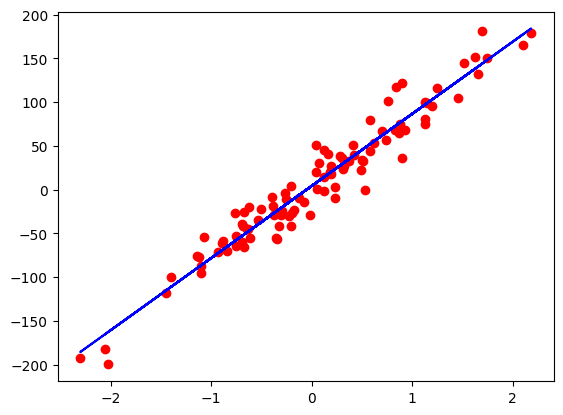

In [120]:
# Training Loop

num_epochs = 100
for epoch in range(num_epochs):
    #forward pass and loss
    y_predicted = model(X)
    loss = criterion (y_predicted,y)
    
    # backward pass
    loss.backward()
    
    #update
    optimizer.step()
    
    optimizer.zero_grad()
    
    if (epoch+1) % 10 ==0:
        print(f'epoch:{epoch+1}, loss = {loss.item():.4f}')
        
# plot

predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()